In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 


In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [10]:
print(df_train.shape)
df_train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
df_train.drop('Loan_ID',axis=1,inplace=True)
df_test.drop('Loan_ID',axis=1,inplace=True)


## handle missing data

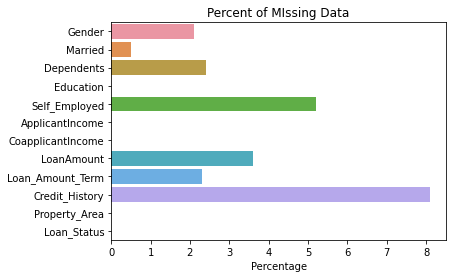

In [6]:
features_missing_values=(df_train.isna().sum()*100/len(df_train)).round(1)
features = df_train.isna().sum().index.tolist()
ax=sns.barplot(x=features_missing_values,y=features)
ax.set(xlabel='Percentage',title='Percent of MIssing Data')
plt.show()

In [62]:
# the percent of missing data in each features not that large

In [7]:
# missing data per observations
NA_row=(df_train.isna().sum(axis=1)*100 / len(df_train.columns)).round(1)
row_index = None
c=0
for i in NA_row:
    if(i>50):
        row_index.append(c)
    c+=1
if (row_index is None):
    print("No observation is gonna be dropped")
else:
    print('observvations are gonna be dropped: ',row_index)

No observation is gonna be dropped


### fill the missing values by using the most using values

In [8]:
df_train1 = df_train.copy()
df_train1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df_train1 = df_train.copy()
c=0
categorical_features=df_train1.select_dtypes(exclude=np.number).columns.tolist()
numeric_features=df_train1.select_dtypes(include=np.number).columns.tolist()
for i in features_missing_values:
    if(i!=0):
        filling_value = None
        column = features[c]
        if(column in categorical_features):
            filling_value=df_train1[column].mode()[0]
            df_train1.loc[:,column] = df_train1.loc[:,column].replace(np.nan,filling_value)
        else:
            filling_value=df_train1[column].mean()
            df_train1.loc[df_train1[column].isna(),column] = df_train1.loc[df_train1[column].isna(),column].replace(np.nan,filling_value).apply(int)
    c+=1

In [10]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# EDA

## Gender

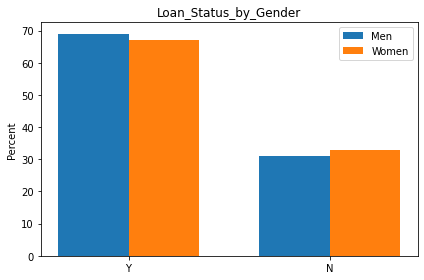

In [11]:
labels = df_train1.loc[(df_train1['Gender']=='Male'),'Loan_Status'].value_counts().index.tolist()
number_of_male=len(df_train1.loc[(df_train1['Gender']=='Male'),'Loan_Status'])
number_of_female=len(df_train1.loc[(df_train1['Gender']=='Female'),'Loan_Status'])
male_percent = df_train1.loc[(df_train1['Gender']=='Male'),'Loan_Status'].value_counts()*100/number_of_male
male_percent=male_percent.round(2).tolist()
female_percent = df_train1.loc[(df_train1['Gender']=='Female'),'Loan_Status'].value_counts()*100/number_of_female
female_percent = female_percent.round(2).tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_percent, width, label='Men')
rects2 = ax.bar(x + width/2, female_percent, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Loan_Status_by_Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [15]:
# can we assume the portions of female and male are equal in getting accepted or rejected ? 
from scipy import stats
male = df_train1.loc[(df_train1['Gender']=='Male'),'Loan_Status'].replace({'Y':1,"N":0})
female = df_train1.loc[(df_train1['Gender']=='Female'),'Loan_Status'].replace({'Y':1,"N":0})
stats.ttest_ind(male,female)

Ttest_indResult(statistic=0.44503785226123393, pvalue=0.6564497584642742)

In [20]:
#since pvalue > 0.05, that means our null hypothesis is correct, so gender dosen't affect the loan status
# gender gonna be dropped

## Married

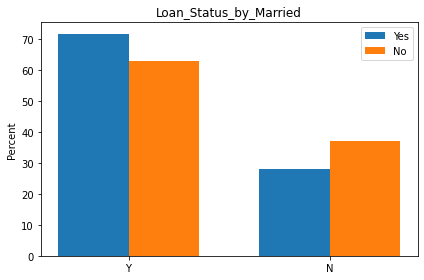

In [21]:
labels = df_train1.loc[(df_train1['Married']=='Yes'),'Loan_Status'].value_counts().index.tolist()
number_of_yes=len(df_train1.loc[(df_train1['Married']=='Yes'),'Loan_Status'])
number_of_no=len(df_train1.loc[(df_train1['Married']=='No'),'Loan_Status'])
yes_percent = df_train1.loc[(df_train1['Married']=='Yes'),'Loan_Status'].value_counts()*100/number_of_yes
yes_percent=yes_percent.round(2).tolist()
no_percent = df_train1.loc[(df_train1['Married']=='No'),'Loan_Status'].value_counts()*100/number_of_no
no_percent = no_percent.round(2).tolist()
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, yes_percent, width, label='Yes')
rects2 = ax.bar(x + width/2, no_percent, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Loan_Status_by_Married')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [22]:
married = df_train1.loc[df_train1['Married']=='Yes','Loan_Status'].replace({'Y':1,"N":0})
non_married = df_train1.loc[df_train1['Married']=='No','Loan_Status'].replace({'Y':1,"N":0})
stats.ttest_ind(married,non_married)

Ttest_indResult(statistic=2.272565009555572, pvalue=0.023398362796616338)

In [19]:
# since p-value less than 0.05, we can reject the null hypothesis, and say that the being married or not affect the loan status

In [23]:
df_train1['Married'].replace({"Yes":1,'No':0},inplace=True)

## Education

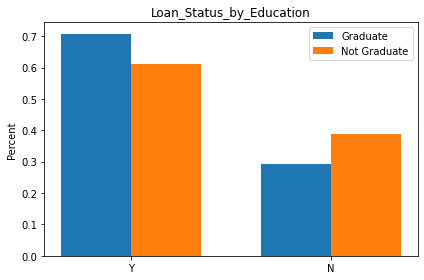

In [27]:
labels = df_train1.loc[(df_train1['Education']=='Graduate'),'Loan_Status'].value_counts().index.tolist()
graduate_percent = [df_train1.loc[(df_train1['Education']=='Graduate'),'Loan_Status'].replace({'Y':1,"N":0}).mean(),1-df_train1.loc[(df_train1['Education']=='Graduate'),'Loan_Status'].replace({'Y':1,"N":0}).mean()]
not_graduate_percent = [df_train1.loc[(df_train1['Education']=='Not Graduate'),'Loan_Status'].replace({'Y':1,"N":0}).mean(),1-df_train1.loc[(df_train1['Education']=='Not Graduate'),'Loan_Status'].replace({'Y':1,"N":0}).mean()]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graduate_percent, width, label='Graduate')
rects2 = ax.bar(x + width/2, not_graduate_percent, width, label='Not Graduate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Loan_Status_by_Education')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [28]:
graduate=df_train1.loc[(df_train1['Education']=='Graduate'),'Loan_Status'].replace({'Y':1,"N":0})
not_graduate=df_train1.loc[(df_train1['Education']=='Not Graduate'),'Loan_Status'].replace({'Y':1,"N":0})
stats.ttest_ind(graduate,not_graduate)

Ttest_indResult(statistic=2.132530087910069, pvalue=0.03336067753728449)

In [315]:
# since p-value less than 0.05, we can reject the null hypothesis, and say that the being graduated or not affect the loan status

In [30]:
df_train1['Education'].replace({'Graduate':1,"Not Graduate":0},inplace=True)

## self_employed

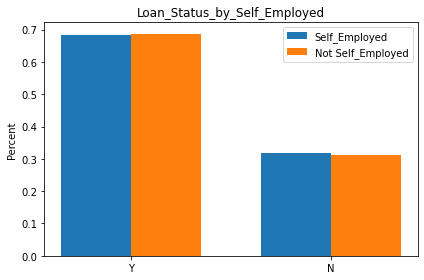

In [31]:
labels = df_train1.loc[(df_train1['Self_Employed']=='Yes'),'Loan_Status'].value_counts().index.tolist()
Self_Employed_percent = [df_train1.loc[(df_train1['Self_Employed']=='Yes'),'Loan_Status'].replace({'Y':1,"N":0}).mean(),1-df_train1.loc[(df_train1['Self_Employed']=='Yes'),'Loan_Status'].replace({'Y':1,"N":0}).mean()]
not_Self_Employed_percent = [df_train1.loc[(df_train1['Self_Employed']=='No'),'Loan_Status'].replace({'Y':1,"N":0}).mean(),1-df_train1.loc[(df_train1['Self_Employed']=='No'),'Loan_Status'].replace({'Y':1,"N":0}).mean()]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Self_Employed_percent, width, label='Self_Employed')
rects2 = ax.bar(x + width/2, not_Self_Employed_percent, width, label='Not Self_Employed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Loan_Status_by_Self_Employed')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [33]:
Self_Employed=df_train1.loc[(df_train1['Self_Employed']=='Yes'),'Loan_Status'].replace({'Y':1,"N":0})
not_Self_Employed=df_train1.loc[(df_train1['Self_Employed']=='No'),'Loan_Status'].replace({'Y':1,"N":0})
stats.ttest_ind(Self_Employed,not_Self_Employed)

Ttest_indResult(statistic=-0.09154440013117748, pvalue=0.9270899835543112)

In [34]:
#since pvalue > 0.05, that means our null hypothesis is correct, so Self_employed dosen't affect the loan status
# self_Emplyed will be drooped

## Property_Area

In [35]:
df_train1['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

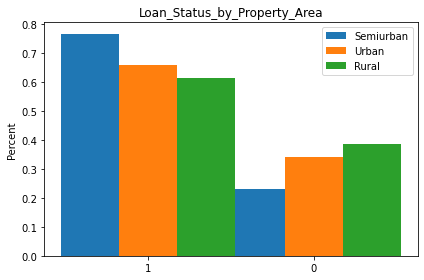

In [36]:
labels = [1,0]
Semiurban_percent = [df_train1.loc[(df_train1['Property_Area']=='Semiurban'),'Loan_Status'].replace({'Y':1,"N":0}).mean(),1-df_train1.loc[(df_train1['Property_Area']=='Semiurban'),'Loan_Status'].replace({'Y':1,"N":0}).mean()]
Urban_percent = [df_train1.loc[(df_train1['Property_Area']=='Urban'),'Loan_Status'].replace({'Y':1,"N":0}).mean(),1-df_train1.loc[(df_train1['Property_Area']=='Urban'),'Loan_Status'].replace({'Y':1,"N":0}).mean()]
Rural_percent = [df_train1.loc[(df_train1['Property_Area']=='Rural'),'Loan_Status'].replace({'Y':1,"N":0}).mean(),1-df_train1.loc[(df_train1['Property_Area']=='Rural'),'Loan_Status'].replace({'Y':1,"N":0}).mean()]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, Semiurban_percent, width, label='Semiurban')
rects2 = ax.bar(x , Urban_percent, width, label='Urban')
rects3 = ax.bar(x + width, Rural_percent, width, label='Rural')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Loan_Status_by_Property_Area')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [39]:
Urban=df_train1.loc[(df_train1['Property_Area']=='Urban'),'Loan_Status'].replace({'Y':1,"N":0})
Rural=df_train1.loc[(df_train1['Property_Area']=='Rural'),'Loan_Status'].replace({'Y':1,"N":0})
semiurban=df_train1.loc[(df_train1['Property_Area']=='Semiurban'),'Loan_Status'].replace({'Y':1,"N":0})

In [40]:
stats.ttest_ind(Urban,Rural)

Ttest_indResult(statistic=0.8881844472470901, pvalue=0.37500486874336647)

In [41]:
stats.ttest_ind(semiurban,Rural)

Ttest_indResult(statistic=3.419138850554969, pvalue=0.0006911381301584281)

In [42]:
stats.ttest_ind(semiurban,Urban)

Ttest_indResult(statistic=2.549782648856051, pvalue=0.011122570192444378)

In [43]:
## Rural,Urban have P-value > 0.05, so we can't reject the null hypothesis 

In [44]:
df_train2 = df_train1.copy()

In [45]:
df_train2['Property_Area'].replace({"Urban":"Rural/Urban","Rural":"Rural/Urban"},inplace=True) 

In [46]:
df_train2.drop(['Gender','Self_Employed'],axis=1,inplace=True)

In [47]:
df_train2

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,5849,0.0,146.0,360.0,1.0,Rural/Urban,Y
1,1,1,1,4583,1508.0,128.0,360.0,1.0,Rural/Urban,N
2,1,0,1,3000,0.0,66.0,360.0,1.0,Rural/Urban,Y
3,1,0,0,2583,2358.0,120.0,360.0,1.0,Rural/Urban,Y
4,0,0,1,6000,0.0,141.0,360.0,1.0,Rural/Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,2900,0.0,71.0,360.0,1.0,Rural/Urban,Y
610,1,3+,1,4106,0.0,40.0,180.0,1.0,Rural/Urban,Y
611,1,1,1,8072,240.0,253.0,360.0,1.0,Rural/Urban,Y
612,1,2,1,7583,0.0,187.0,360.0,1.0,Rural/Urban,Y


## numeric Variables

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>]], dtype=object)

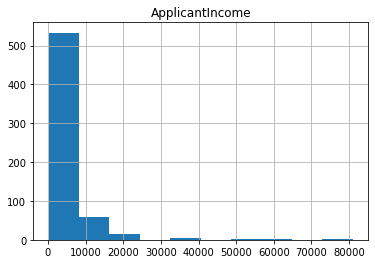

In [49]:
df_train2.hist('ApplicantIncome')

array([[<AxesSubplot:title={'center':'CoapplicantIncome'}>]], dtype=object)

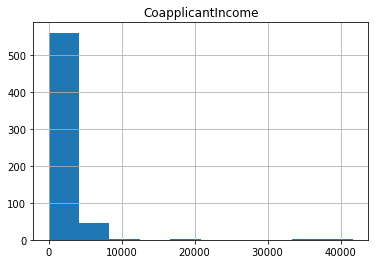

In [50]:
df_train2.hist('CoapplicantIncome')

array([[<AxesSubplot:title={'center':'LoanAmount'}>]], dtype=object)

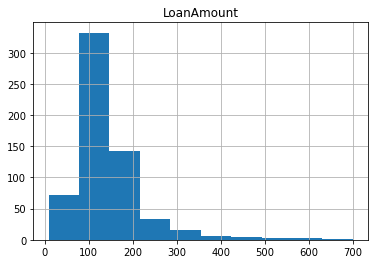

In [51]:
df_train2.hist('LoanAmount')

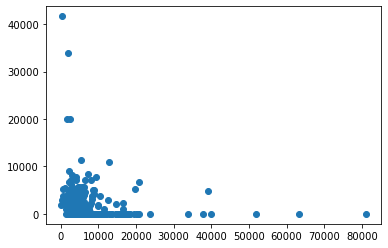

In [54]:
plt.scatter(df_train2['ApplicantIncome'],df_train2['CoapplicantIncome'])

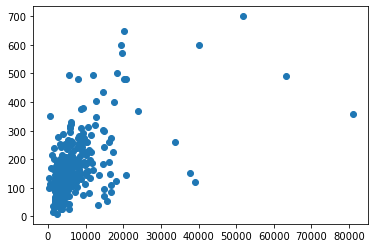

In [55]:
plt.scatter(df_train2['ApplicantIncome'],df_train2['LoanAmount'])

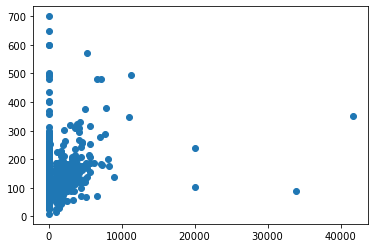

In [56]:
plt.scatter(df_train2['CoapplicantIncome'],df_train2['LoanAmount'])

In [57]:
df_train3=df_train2.copy()

In [59]:
df_train3['LoanAmount'] =np.log(df_train3['LoanAmount']+1) 
df_train3['CoapplicantIncome'] =np.log(df_train3['CoapplicantIncome']+1) 
df_train3['ApplicantIncome'] =np.log(df_train3['ApplicantIncome']+1) 

array([[<AxesSubplot:title={'center':'LoanAmount'}>]], dtype=object)

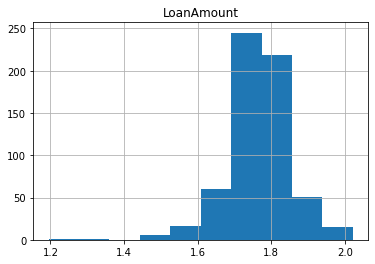

In [60]:
df_train3.hist('LoanAmount')

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>]], dtype=object)

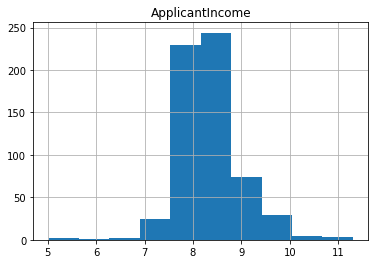

In [61]:
df_train3.hist('ApplicantIncome')

array([[<AxesSubplot:title={'center':'CoapplicantIncome'}>]], dtype=object)

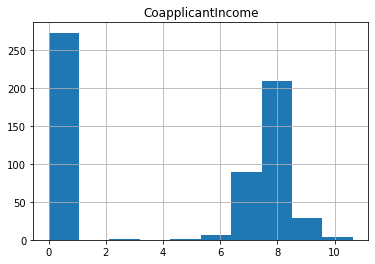

In [62]:
df_train3.hist('CoapplicantIncome')

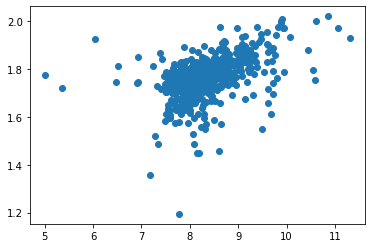

In [64]:
plt.scatter(df_train3['ApplicantIncome'],df_train3['LoanAmount'])

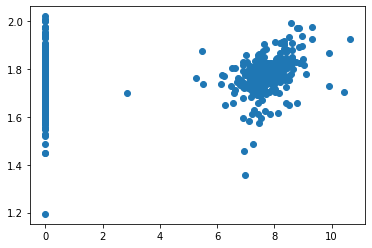

In [65]:
plt.scatter(df_train3['CoapplicantIncome'],df_train3['LoanAmount'])

In [66]:
df_train3['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [67]:
df_train3['Loan_Amount_Term'] = (df_train3['Loan_Amount_Term']/12).apply(int)

In [68]:
df_train3['Loan_Amount_Term']

0      30
1      30
2      30
3      30
4      30
       ..
609    30
610    15
611    30
612    30
613    30
Name: Loan_Amount_Term, Length: 614, dtype: int64

In [70]:
df_train3['Credit_History'].unique()

array([1., 0.])

In [71]:
Credit_History=df_train1.loc[(df_train1['Credit_History']==1),'Loan_Status'].replace({'Y':1,"N":0})
not_Credit_History=df_train1.loc[(df_train1['Credit_History']==0),'Loan_Status'].replace({'Y':1,"N":0})
stats.ttest_ind(Credit_History,not_Credit_History)

Ttest_indResult(statistic=11.870669715478499, pvalue=2.1445069283823224e-29)

In [72]:
# since P-value < 0.05, the null hypothesis will be rejected.Also credit history will be in count

In [74]:
df_train3['Loan_Status'] = df_train3['Loan_Status'].replace({'Y':1,"N":0})

In [75]:
df_train3.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,8.674197,0.000000,1.790164,30,1.0,Rural/Urban,1
1,1,1,1,8.430327,7.319202,1.768118,30,1.0,Rural/Urban,0
2,1,0,1,8.006701,0.000000,1.649561,30,1.0,Rural/Urban,1
3,1,0,0,7.857094,7.765993,1.757132,30,1.0,Rural/Urban,1
4,0,0,1,8.699681,0.000000,1.784370,30,1.0,Rural/Urban,1


In [ ]:
df_train3.to_csv(r'C:\Users\kgu96\Desktop\DS\Begginer\Loan_prediction\loan\trainset.csv',index=None)